# C3M3: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Implement kernel smoothing in R and interpret the results.

2. Implement smoothing splines as an alternative to kernel estimation.

3. Implement and interpret the loess smoother in R.

4. Compare and contrast nonparametric smoothing methods.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [2]:
# Load Required Packages
library(ggplot2)
library(mgcv)

# Problem 1: Advertising data

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

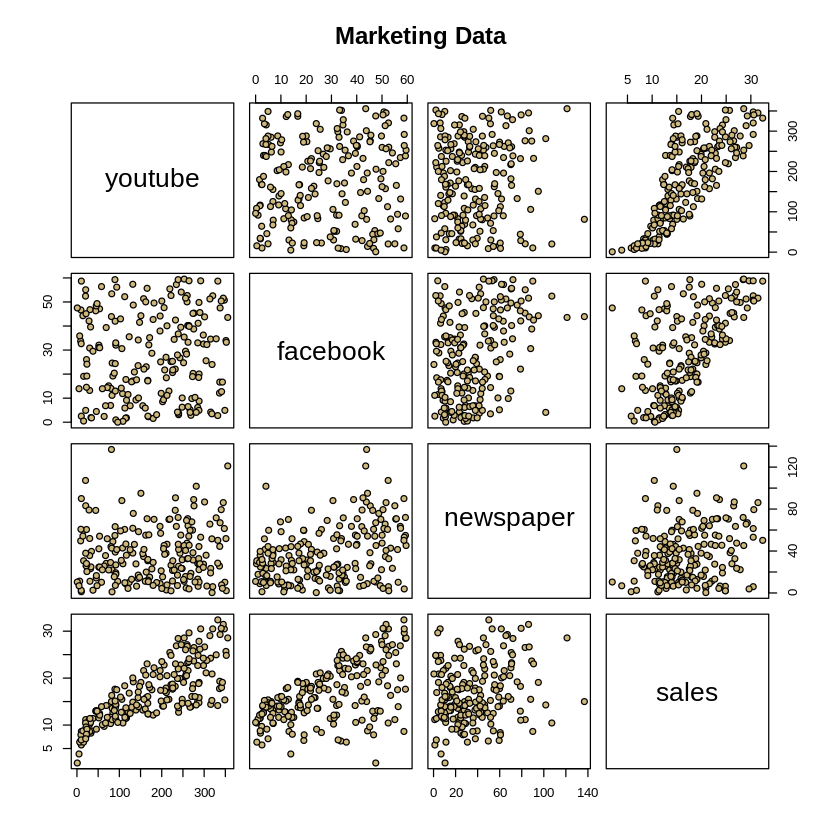

In [3]:
# Load in the data
marketing = read.csv("marketing.txt", sep="")
summary(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [4]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**1.(a) Working with nonlinearity: Kernel regression**

Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us back in the first course in this specialization, when we modeled the data as if it were linear. For now, let's just focus on the relationship between `sales` and `youtube`, omitting the other variables (future lessons on generalized additive models will allow us to bring back other predictors).

Using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor), and then fit and overlay a kernel regression. Experiment with the bandwidth parameter until the smooth looks appropriate, or comment why no bandwidth is ideal. Justify your answer.

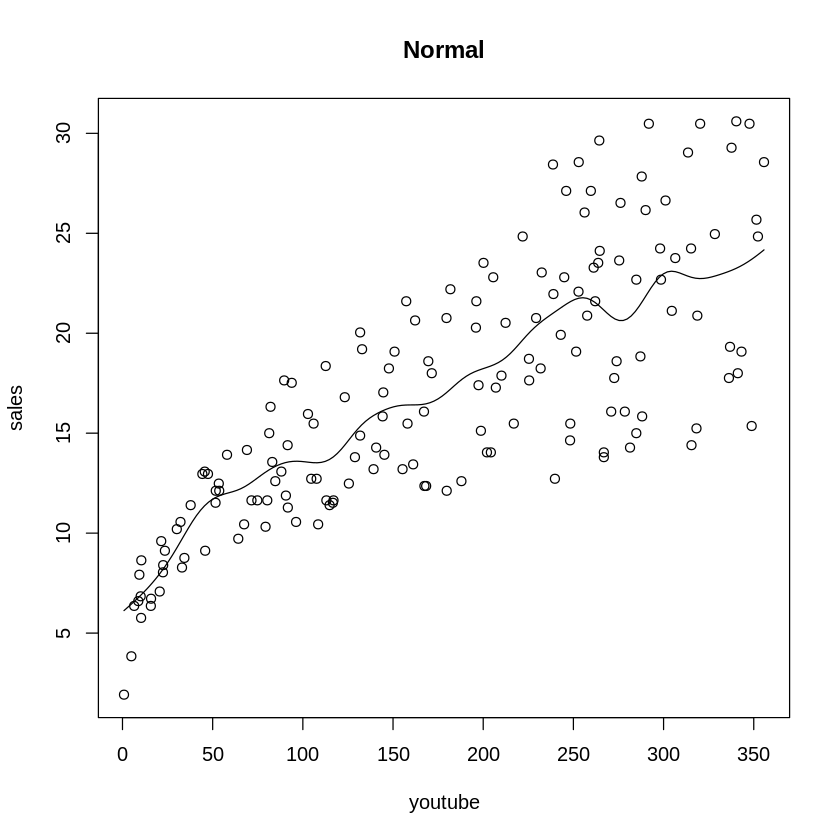

In [32]:
# Load Required Packages
library(ggplot2)
library(mgcv)

# Plotting and fitting kernel regression
plot(sales ~ youtube, data = train_marketing, main = 
     "Normal")
lines(ksmooth(train_marketing$youtube, train_marketing$sales, 
              kernel = "normal", 30))

none of these fits work. they are to hectic and not smooth.

**1.(b) Working with nonlinearity: Smoothing spline regression**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a smoothing spline regression model. Experiment with the smoothing parameter until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

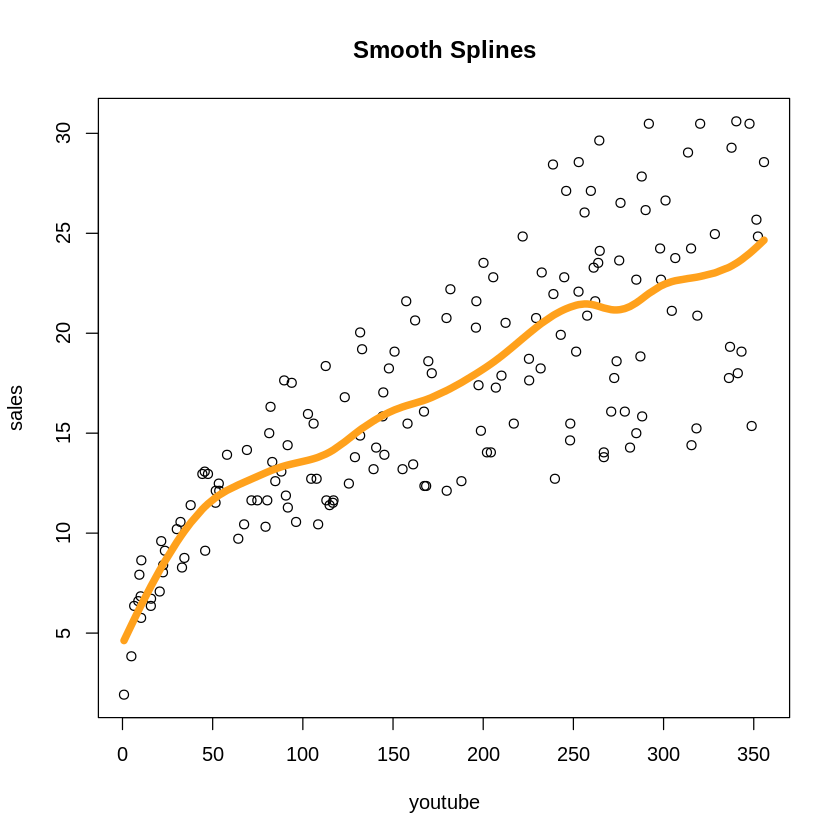

In [27]:
marketing.smooth = with(train_marketing, smooth.spline(y = sales, x
= youtube, spar = 0.75))
plot(sales ~ youtube, data = train_marketing, main = 
     "Smooth Splines")
lines(marketing.smooth, col = "#FFA11C", lwd=6)

This fit works better than the previous, its smoother.

**1.(c) Working with nonlinearity: Loess**

Again, using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor). This time, fit and overlay a loess regression model. You can use the `loess()` function in a similar way as the `lm()` function. Experiment with the smoothing parameter (`span` in the `geom_smooth()` function) until the smooth looks appropriate. Explain why it's appropriate and justify your answer.

`geom_smooth()` using formula 'y ~ x'



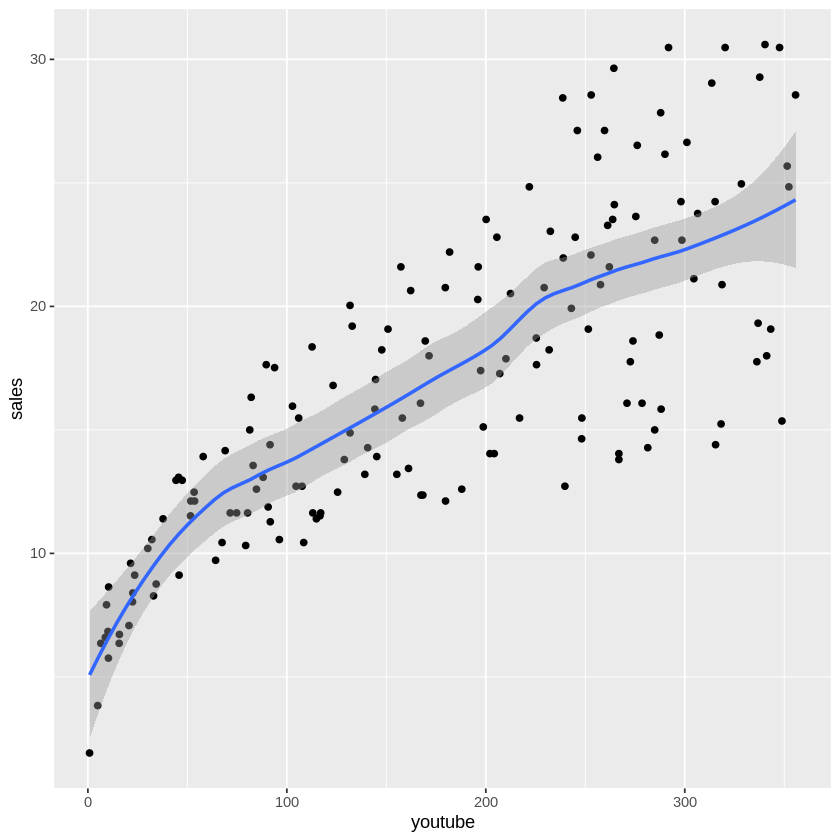

In [6]:
# Load Required Packages
library(ggplot2)

# Plotting and fitting loess regression
ggplot(train_marketing, aes(x = youtube, y = sales)) +
  geom_point() +
  geom_smooth(method = "loess", span = 0.5)


This fits much better the bottom is smooth, and the top isn't perfectly smooth but much better.

**1.(d) A prediction metric**

Compare the models using the mean squared prediction error (MSPE) on the `test_marketing` dataset. That is, calculate the MSPE for your kernel regression, smoothing spline regression, and loess model, and identify which model is best in terms of this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [7]:
# Kernel regression
yhat_kr <- ksmooth(train_marketing$youtube, train_marketing$sales, kernel = "normal", bandwidth = 40, x.points = test_marketing$youtube)
mspe_kr <- mean((test_marketing$sales - yhat_kr$y)^2)

# Smoothing spline regression
spline_model <- gam(sales ~ s(youtube, bs = "cr"), data = train_marketing)
yhat_ss <- predict(spline_model, newdata = test_marketing)
mspe_ss <- mean((test_marketing$sales - yhat_ss)^2)

# Loess regression
loess_model <- loess(sales ~ youtube, data = train_marketing)
yhat_loess <- predict(loess_model, newdata = test_marketing)
mspe_loess <- mean((test_marketing$sales - yhat_loess)^2)

# Compare MSPE values
mspe_values <- c(kernel = mspe_kr, spline = mspe_ss, loess = mspe_loess)
best_model <- names(mspe_values)[which.min(mspe_values)]

mspe_values
best_model


kernel   spline    loess 
64.45882 17.53930 18.04026

[1] "spline"

the smallest MSPE is spline at 17.539

# Problem 2: Simulations!

Simulate data (one predictor and one response) with your own nonlinear relationship. Provide an explanation of how you generated the data. Then answer the questions above (1.(a) - 1.(d)) using your simulated data.

[1] 40  2

[1] 160   2

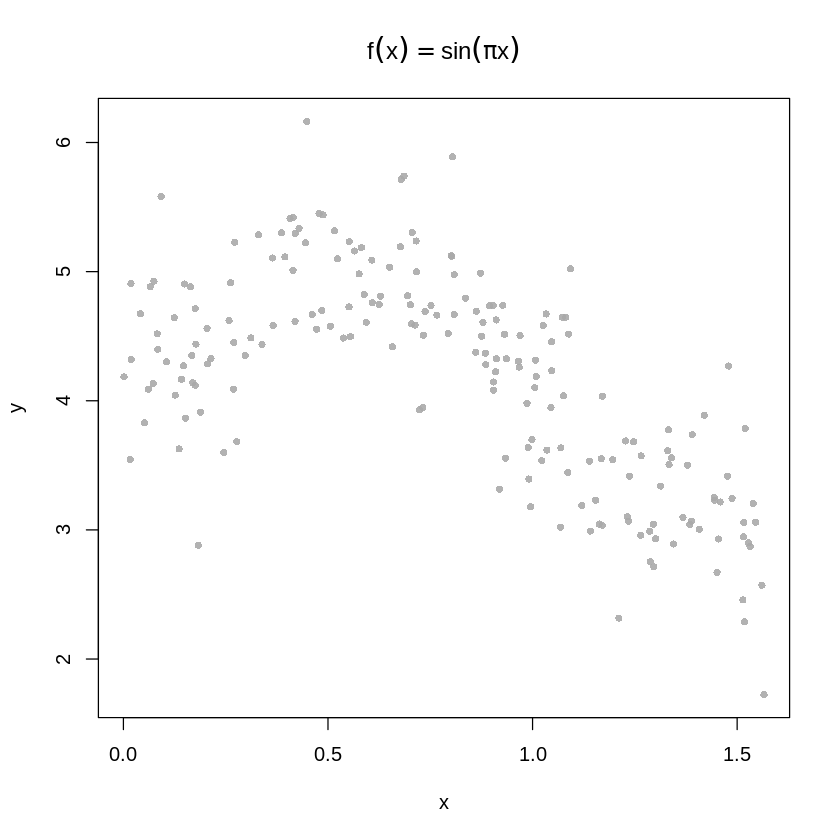

In [35]:
# # #simulated data
# # # Set the seed for reproducibility
# # set.seed(123)

# # # Define the coefficients for the quadratic relationship
# # alpha0 <- 1
# # alpha1 <- 2
# # alpha2 <- 0.5

# # # Generate the predictor variable
# # x <- seq(-10, 10, length.out = 100)

# # # Generate the response variable with the quadratic relationship
# # y <- alpha0 + alpha1 * x + alpha2 * x^2 + rnorm(length(x), mean = 0, sd = 1)

# # # Create a dataframe with the simulated data
# # simulated_data <- data.frame(x = x, y = y)


# n = 200
# x = runif(n, 0, pi/2)
# y = sin(pi*x) + rnorm(n, 0, 0.5) + 4
# d = data.frame(x=x,y=y)

# set.seed(1771)
# n = floor(0.8 * nrow(d)) 
# index = sample(seq_len(nrow(d)), size = n) 

# train_sim = d[index, ] 
# test_sim = d[-index, ] 

# s

# dim(test_sim) 
# dim(train_sim) 

# plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))


set.seed(111)
library(ggplot2)

n = 200
x = runif(n, 0, pi/2)
y = sin(pi*x) + rnorm(n, 0, 0.5) + 4
d = data.frame(x=x,y=y)


set.seed(12) 
n = floor(0.8 * nrow(d)) 
index = sample(seq_len(nrow(d)), size = n) 

train_sim = d[index, ] #set the training set to be the randomly sam
test_sim = d[-index, ] 

dim(test_sim) #check the dimensions
dim(train_sim) #check the dimensions
plot(y ~ x, main = expression(f(x) == sin(pi*x)), pch = 16, cex=0.8, col = alpha("darkgrey", 0.9))

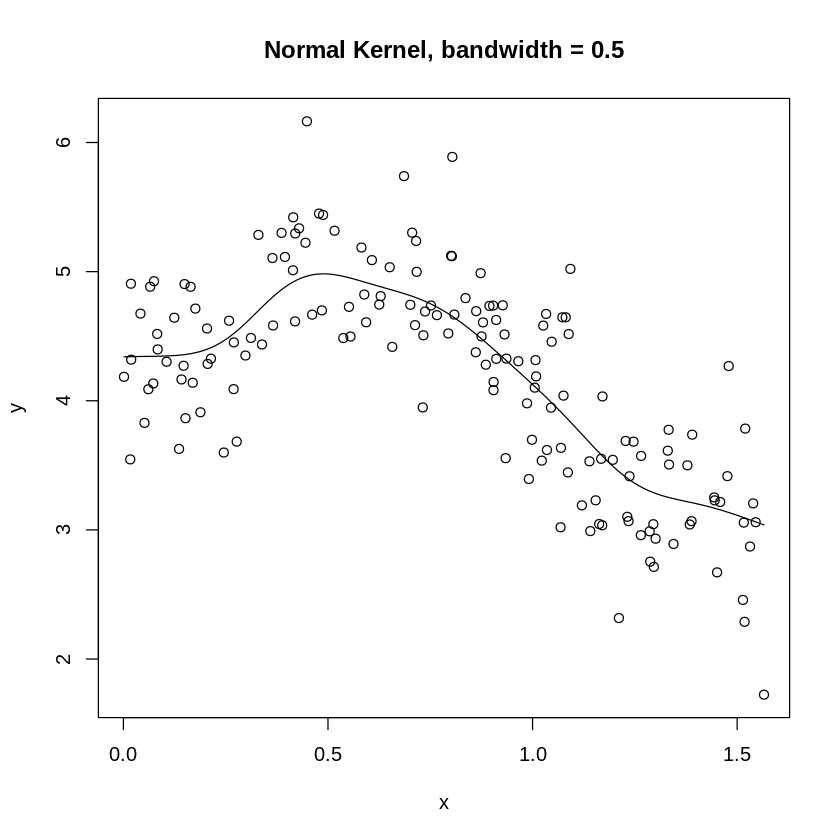

In [36]:
plot(y ~ x, data = train_sim, main = "Normal Kernel, bandwidth = 0.5")
lines(ksmooth(train_sim$x, train_sim$y, kernel = "normal", 0.3))

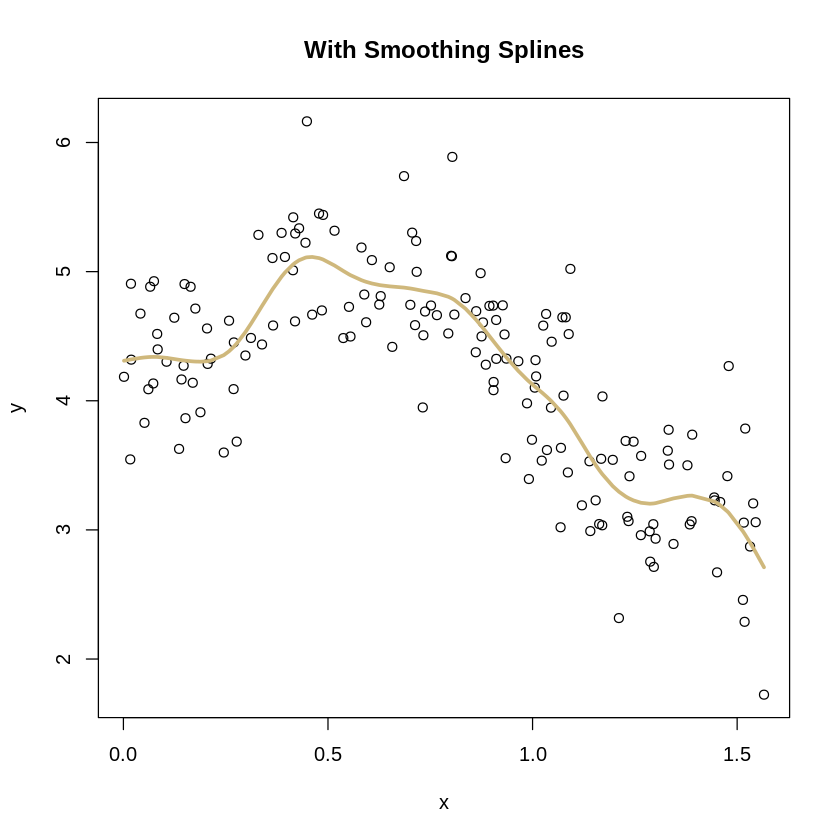

In [37]:
sim.smooth = with(train_sim, smooth.spline(y = y, x = x, spar = 0.75))
plot(y ~ x, data = train_sim, main = "With Smoothing Splines")
lines(sim.smooth, col = "#CFB87C", lwd=3)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



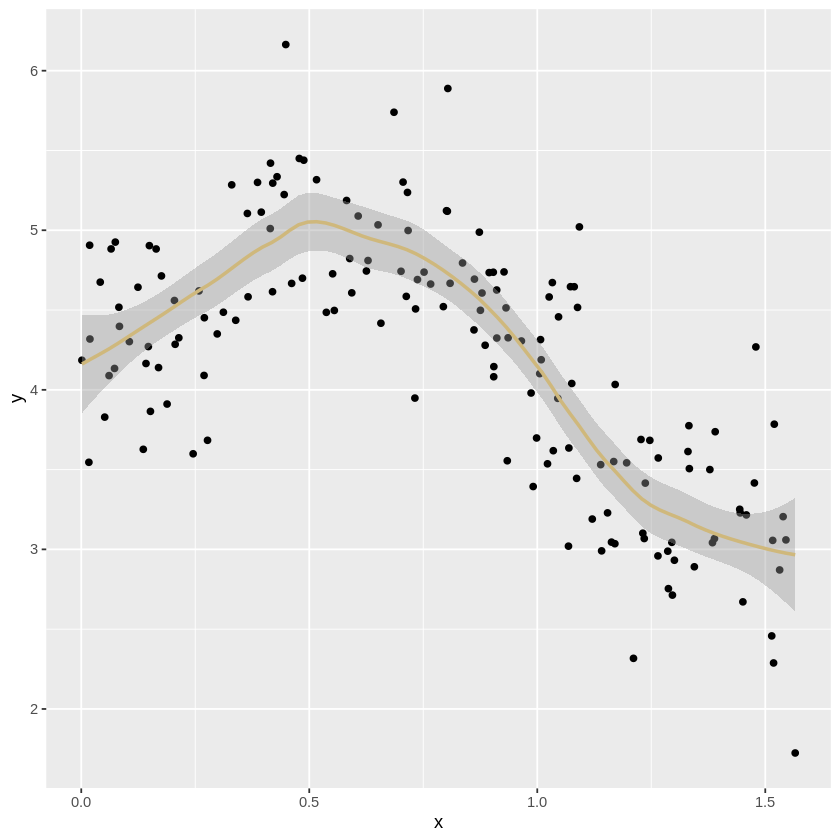

In [38]:
#1.c
lr = loess(y ~ x, train_sim, span = 0.5) 

ggplot(train_sim, aes(x = x, y = y))+
geom_point() +
geom_smooth(color = "#CFB87C", span = 0.5)

In [39]:
#1.d
yhat_kr = ksmooth(train_sim$x, train_sim$y, kernel = "normal", 40,
x.points = test_sim$x)
cat("The MSPE for kernel regression is", mean((test_sim$y - yhat_kr$y)^2),".")

yhat_ss = predict(sim.smooth, x = test_sim$x);

cat("The MSPE for smoothing spline regression is",mean((test_sim$y - yhat_ss$y)^2), ".")
yhat_loess = predict(lr, newdata = test_sim$x);

cat("The MSPE for loess regression is", mean((test_sim$y - yhat_loess)^2), ".")

The MSPE for kernel regression is 0.7469128 .The MSPE for smoothing spline regression is 0.263158 .The MSPE for loess regression is 0.2808872 .

spline again fits teh best at .263